# Boliga

In [3]:
import pandas as pd
import tqdm
import time

# Base URL for the Boliga website, with a placeholder for the page number
base_url = 'https://www.boliga.dk/salg/resultater?searchTab=1&sort=date-d&page={}'

# List to store DataFrames for each page
all_dfs = []

# Iterate over a range of pages, e.g., from page 1 to 10
for page in tqdm.tqdm(range(1, 11)):
    # Format the URL with the current page number
    url = base_url.format(page)
    
    try:
        # Read the table(s) from the webpage
        dfs = pd.read_html(url)
        
        # Assuming the first table contains the data you want
        df = dfs[0]
        all_dfs.append(df)
        
    except Exception as e:
        print(f"Error occurred on page {page}: {e}")
        continue  # Continue to the next page
    
    time.sleep(0.5)  # Be polite to the server by adding a delay

# Concatenate all DataFrames into one
final_df = pd.concat(all_dfs, ignore_index=True)

# Save the final DataFrame to a CSV file
#final_df.to_csv('boliga_listings.csv', index=False)
#print("Data saved to boliga_listings.csv")


100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.58s/it]

Data saved to boliga_listings.csv


In [4]:
df = pd.read_csv('boliga_listings.csv')
df

,Boligtype & Adresse,KÃ¸besum,Dato & Type,mÂ² & Kr. / mÂ²,VÃ¦r.,ByggeÃ¥r,Den procentuelle forskel mellem seneste udbudspris og salgsprisen %,Unnamed: 7
0,Ejerlejlighed EEjerlejlighed RyttergÃ¥rdsvej 1...,2.025.000 kr.,07-08-2024Alm. Salg,82 mÂ² 24.695 kr/mÂ²,3,1965,-3%,Aktuel vÃ¦rdi
1,"Ejerlejlighed EEjerlejlighed Byagervej 133, st...",2.145.000 kr.,07-08-2024Alm. Salg,74 mÂ² 28.986 kr/mÂ²,3,1959,-7%,Aktuel vÃ¦rdi
2,"Ejerlejlighed EEjerlejlighed Palermovej 5, 4. ...",2.975.000 kr.,07-08-2024Alm. Salg,69 mÂ² 43.116 kr/mÂ²,3,1937,NaN,Aktuel vÃ¦rdi
3,Villa VVilla Snorgyden 14 8305 SamsÃ¸,370.000 kr.,07-08-2024Alm. Salg,60 mÂ² 6.167 kr/mÂ²,3,1852,NaN,Aktuel vÃ¦rdi
4,Fritidshus FFritidshus KjeldhÃ¸j 90 9640 FarsÃ¸,960.000 kr.,07-08-2024Alm. Salg,98 mÂ² 9.796 kr/mÂ²,3,1978,-4%,Aktuel vÃ¦rdi
...,...,...,...,...,...,...,...,...
495,RÃ¦kkehus RRÃ¦kkehus TrÃ¦ningsbanen 12 4683 R...,23.600.000 kr.,24-07-2024Alm. Salg,98 mÂ² 240.816 kr/mÂ²,4,2021,NaN,Aktuel vÃ¦rdi
496,Villa VVilla Chr Thisteds Vej 16 9500 Hobro,1.425.000 kr.,24-07-2024Alm. Salg,140 mÂ² 10.179 kr/mÂ²,5,2022,-29%,Aktuel vÃ¦rdi
497,Fritidshus FFritidshus Klokkelyngvej 19 6792 ...,950.000 kr.,24-07-2024Alm. Salg,97 mÂ² 9.794 kr/mÂ²,4,2007,-10%,Aktuel vÃ¦rdi
498,RÃ¦kkehus RRÃ¦kkehus NikkelsbÃ¦kvej 39B 4780 ...,775.000 kr.,24-07-2024Alm. Salg,81 mÂ² 9.568 kr/mÂ²,4,2007,NaN,Aktuel vÃ¦rdi


In [ ]:
import pandas as pd
import tqdm
import time
import json
import os

# Base URL for the Boliga website, with a placeholder for the page number
base_url = 'https://www.boliga.dk/salg/resultater?searchTab=1&sort=date-d&page={}'

# JSON file to save data incrementally
json_filename = 'boliga_listings.json'
progress_filename = 'boliga_progress.json'

# Load existing data if available
if os.path.exists(json_filename):
    with open(json_filename, 'r') as f:
        all_dfs = json.load(f)
else:
    all_dfs = []

# Load existing progress if available
if os.path.exists(progress_filename):
    with open(progress_filename, 'r') as f:
        scraped_pages = set(json.load(f))
else:
    scraped_pages = set()

# Iterate over a range of pages, e.g., from page 1 to 2000
for page in tqdm.tqdm(range(1, 3000)):
    if page in scraped_pages:
        print(f"Skipping already scraped page {page}")
        continue
    
    # Format the URL with the current page number
    url = base_url.format(page)
    
    try:
        # Read the table(s) from the webpage
        dfs = pd.read_html(url)
        
        # Assuming the first table contains the data you want
        df = dfs[0].to_dict(orient='records')
        all_dfs.extend(df)
        
        # Save progress
        with open(json_filename, 'w') as f:
            json.dump(all_dfs, f)
        
        # Mark the page as scraped
        scraped_pages.add(page)
        with open(progress_filename, 'w') as f:
            json.dump(list(scraped_pages), f)
        
    except Exception as e:
        print(f"Error occurred on page {page}: {e}")
        continue  # Continue to the next page
    
    time.sleep(0.5)  # Be polite to the server by adding a delay

# Convert the list of dictionaries back to a DataFrame
final_df = pd.DataFrame(all_dfs)

# Save the final DataFrame to a CSV file
final_df.to_csv('boliga_listings.csv', index=False)
print("Data saved to boliga_listings.csv")


  0%|                                                  | 0/2999 [00:00<?, ?it/s]

Skipping already scraped page 1
Skipping already scraped page 2
Skipping already scraped page 3
Skipping already scraped page 4
Skipping already scraped page 5
Skipping already scraped page 6
Skipping already scraped page 7
Skipping already scraped page 8
Skipping already scraped page 9
Skipping already scraped page 10
Skipping already scraped page 11
Skipping already scraped page 12
Skipping already scraped page 13
Skipping already scraped page 14
Skipping already scraped page 15
Skipping already scraped page 16
Skipping already scraped page 17
Skipping already scraped page 18
Skipping already scraped page 19
Skipping already scraped page 20
Skipping already scraped page 21
Skipping already scraped page 22
Skipping already scraped page 23
Skipping already scraped page 24
Skipping already scraped page 25
Skipping already scraped page 26
Skipping already scraped page 27
Skipping already scraped page 28
Skipping already scraped page 29
Skipping already scraped page 30
Skipping already sc

 79%|██████████████████████████████▋        | 2360/2999 [13:43<26:31,  2.49s/it]

In [52]:
df = pd.read_csv('boliga_listings.csv', low_memory=False)

In [53]:
df.describe()

,VÃ¦r.,ByggeÃ¥r,Vær.,Byggeår
count,99900.000000,99900.000000,50.000000,50.000000
mean,4.109339,1925.018949,4.620000,1943.860000
std,1.701814,240.832263,1.850427,53.519788
min,0.000000,0.000000,2.000000,1750.000000
25%,3.000000,1930.000000,4.000000,1918.250000
50%,4.000000,1965.000000,4.000000,1963.000000
75%,5.000000,1978.000000,5.000000,1975.000000
max,92.000000,2024.000000,12.000000,2014.000000


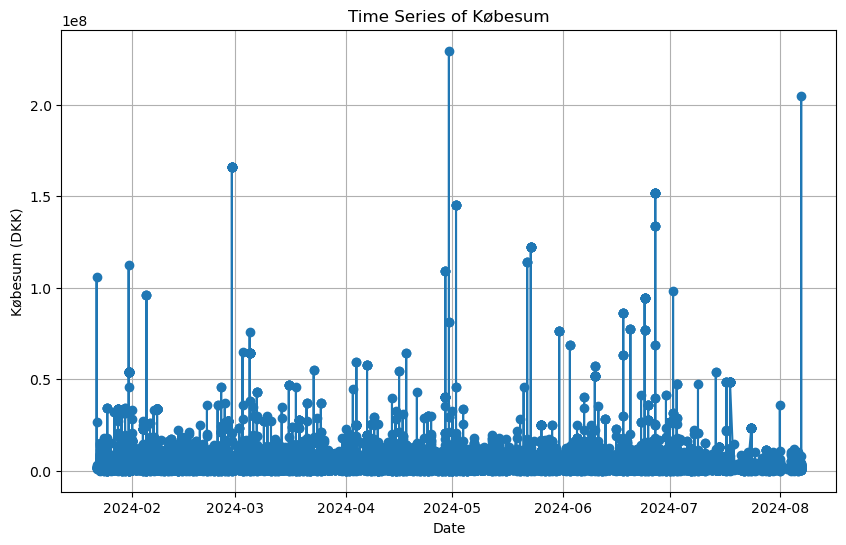

In [49]:
import matplotlib.pyplot as plt


# Extract the date and convert it to datetime
df['Dato'] = df['Dato & Type'].str.extract(r'(\d{2}-\d{2}-\d{4})')
df['Dato'] = pd.to_datetime(df['Dato'], format='%d-%m-%Y')

# Ensure 'Købesum' is a string before cleaning
df['KÃ¸besum'] = df['KÃ¸besum'].astype(str)

# Clean the 'Købesum' column to remove 'kr.', non-breaking spaces, and convert to numeric
df['KÃ¸besum'] = df['KÃ¸besum'].str.replace('\xa0', '')  # Remove non-breaking spaces
df['KÃ¸besum'] = df['KÃ¸besum'].str.replace(' kr.', '')  # Remove ' kr.'
df['KÃ¸besum'] = df['KÃ¸besum'].str.replace('kr', '')  # Remove 'kr'
df['KÃ¸besum'] = df['KÃ¸besum'].str.replace('.', '')  # Remove thousand separators
df['KÃ¸besum'] = df['KÃ¸besum'].astype(int)  # Convert to integer

# Plotting the time series of Købesum
plt.figure(figsize=(10, 6))
plt.plot(df['Dato'], df['KÃ¸besum'], marker='o')
plt.title('Time Series of Købesum')
plt.xlabel('Date')
plt.ylabel('Købesum (DKK)')
plt.grid(True)
plt.show()

In [36]:
first_element = df['mÂ² & Kr. / mÂ²'].iloc[3]
first_element

'60 mÂ² 6.167 kr/mÂ²'

In [54]:
import pandas as pd

def parse_boligtype_adresse(entry):
    # Split the entry based on the first space to get the type and the rest
    type_and_rest = entry.split(' ', 1)
    
    # Extract the type and the symbol
    bolig_type = type_and_rest[0]  # First part is the type
    symbol = bolig_type[0]  # Symbol is the first letter of the type
    
    # Remove unnecessary repetition of type and split the rest
    rest = type_and_rest[1].replace(bolig_type, '', 1).strip() if len(type_and_rest) > 1 else ""
    
    # Remove the symbol from the start of the rest if it appears
    if rest.startswith(symbol):
        rest = rest[len(symbol):].strip()
    
    # Extract address, zip, and city from the remaining string
    try:
        address, zip_and_city = rest.rsplit(' ', 1)
        zip_code, city = zip_and_city.split(' ', 1)
    except ValueError:
        # If splitting fails, try to correct by splitting differently or assign None
        parts = rest.rsplit(' ', 2)
        if len(parts) == 3:
            address, zip_code, city = parts
        else:
            address = rest
            zip_code = None
            city = None
    
    return bolig_type, symbol, address, zip_code, city

# Apply the function to the DataFrame and create new columns
df[['Type', 'Symbol', 'Address', 'Zip', 'City']] = df['Boligtype & Adresse'].apply(parse_boligtype_adresse).apply(pd.Series)
df
# Inspect the DataFrame to see the results
#print(df[['Type', 'Symbol', 'Address', 'Zip', 'City']].head())


,Boligtype & Adresse,KÃ¸besum,Dato & Type,mÂ² & Kr. / mÂ²,VÃ¦r.,ByggeÃ¥r,Den procentuelle forskel mellem seneste udbudspris og salgsprisen %,Unnamed: 7,Købesum,m² & Kr. / m²,Vær.,Byggeår,Type,Symbol,Address,Zip,City
0,Ejerlejlighed EEjerlejlighed RyttergÃ¥rdsvej 1...,2.025.000 kr.,07-08-2024Alm. Salg,82 mÂ² 24.695 kr/mÂ²,3.0,1965.0,-3%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Ejerlejlighed,E,"RyttergÃ¥rdsvej 18, 2. 209",3520,Farum
1,"Ejerlejlighed EEjerlejlighed Byagervej 133, st...",2.145.000 kr.,07-08-2024Alm. Salg,74 mÂ² 28.986 kr/mÂ²,3.0,1959.0,-7%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Ejerlejlighed,E,"Byagervej 133, st. tv",3460,BirkerÃ¸d
2,"Ejerlejlighed EEjerlejlighed Palermovej 5, 4. ...",2.975.000 kr.,07-08-2024Alm. Salg,69 mÂ² 43.116 kr/mÂ²,3.0,1937.0,NaN,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Ejerlejlighed,E,"Palermovej 5, 4. tv 2300",KÃ¸benhavn,S
3,Villa VVilla Snorgyden 14 8305 SamsÃ¸,370.000 kr.,07-08-2024Alm. Salg,60 mÂ² 6.167 kr/mÂ²,3.0,1852.0,NaN,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Villa,V,Snorgyden 14,8305,SamsÃ¸
4,Fritidshus FFritidshus KjeldhÃ¸j 90 9640 FarsÃ¸,960.000 kr.,07-08-2024Alm. Salg,98 mÂ² 9.796 kr/mÂ²,3.0,1978.0,-4%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Fritidshus,F,KjeldhÃ¸j 90,9640,FarsÃ¸
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,Villa VVilla Brahesborgvej 29 7000 Fredericia,1.930.000 kr.,22-06-2023Alm. Salg,143 mÂ² 13.497 kr/mÂ²,5.0,1983.0,-3%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Villa,V,Brahesborgvej 29,7000,Fredericia
99946,Villa VVilla LillegÃ¥rdsvej 4 5953 TranekÃ¦r,525.000 kr.,22-06-2023Alm. Salg,98 mÂ² 5.357 kr/mÂ²,4.0,1917.0,-4%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Villa,V,LillegÃ¥rdsvej 4,5953,TranekÃ¦r
99947,Fritidshus FFritidshus DrÃ¸sselbjergvej 50 42...,1.545.000 kr.,22-06-2023Alm. Salg,66 mÂ² 23.409 kr/mÂ²,4.0,1963.0,NaN,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Fritidshus,F,DrÃ¸sselbjergvej 50,4200,Slagelse
99948,RÃ¦kkehus RRÃ¦kkehus Birkevej 3B 9370 Hals,950.000 kr.,22-06-2023Alm. Salg,86 mÂ² 11.047 kr/mÂ²,3.0,2002.0,-16%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,RÃ¦kkehus,R,Birkevej 3B,9370,Hals


In [37]:
# Function to parse 'm² & Kr. / m²'
def parse_m2_price(entry):
    try:
        # Split the string based on spaces
        parts = entry.split(' ')
        
        # Extract square meters and price per square meter
        square_meters = float(parts[0].replace('m²', '').strip())
        price_per_m2 = float(parts[2].replace('kr/m²', '').replace('.', '').strip())
        
    except (ValueError, IndexError):
        # Handle cases where parsing fails
        square_meters = None
        price_per_m2 = None
    
    return square_meters, price_per_m2

# Apply the function to the DataFrame and create new columns
df[['Square_Meters', 'Price_per_m2']] = df['mÂ² & Kr. / mÂ²'].apply(parse_m2_price).apply(pd.Series)
df
# Inspect the DataFrame to see the results
#print(df[['Square_Meters', 'Price_per_m2']].head())


,Boligtype & Adresse,KÃ¸besum,Dato & Type,mÂ² & Kr. / mÂ²,VÃ¦r.,ByggeÃ¥r,Den procentuelle forskel mellem seneste udbudspris og salgsprisen %,Unnamed: 7,Type,Symbol,Address,Zip,City,Square_Meters,Price_per_m2
0,Ejerlejlighed EEjerlejlighed RyttergÃ¥rdsvej 1...,2.025.000 kr.,07-08-2024Alm. Salg,82 mÂ² 24.695 kr/mÂ²,3,1965,-3%,Aktuel vÃ¦rdi,Ejerlejlighed,E,"RyttergÃ¥rdsvej 18, 2. 209",3520,Farum,82.0,24695.0
1,"Ejerlejlighed EEjerlejlighed Byagervej 133, st...",2.145.000 kr.,07-08-2024Alm. Salg,74 mÂ² 28.986 kr/mÂ²,3,1959,-7%,Aktuel vÃ¦rdi,Ejerlejlighed,E,"Byagervej 133, st. tv",3460,BirkerÃ¸d,74.0,28986.0
2,"Ejerlejlighed EEjerlejlighed Palermovej 5, 4. ...",2.975.000 kr.,07-08-2024Alm. Salg,69 mÂ² 43.116 kr/mÂ²,3,1937,NaN,Aktuel vÃ¦rdi,Ejerlejlighed,E,"Palermovej 5, 4. tv 2300",KÃ¸benhavn,S,69.0,43116.0
3,Villa VVilla Snorgyden 14 8305 SamsÃ¸,370.000 kr.,07-08-2024Alm. Salg,60 mÂ² 6.167 kr/mÂ²,3,1852,NaN,Aktuel vÃ¦rdi,Villa,V,Snorgyden 14,8305,SamsÃ¸,60.0,6167.0
4,Fritidshus FFritidshus KjeldhÃ¸j 90 9640 FarsÃ¸,960.000 kr.,07-08-2024Alm. Salg,98 mÂ² 9.796 kr/mÂ²,3,1978,-4%,Aktuel vÃ¦rdi,Fritidshus,F,KjeldhÃ¸j 90,9640,FarsÃ¸,98.0,9796.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,Villa VVilla Isafjordvej 63 4000 Roskilde,4.350.000 kr.,13-02-2024Alm. Salg,138 mÂ² 31.522 kr/mÂ²,4,2005,-3%,Aktuel vÃ¦rdi,Villa,V,Isafjordvej 63,4000,Roskilde,138.0,31522.0
34946,Villa VVilla Randersvej 24 8870 LangÃ¥,1.400.000 kr.,13-02-2024Alm. Salg,132 mÂ² 10.606 kr/mÂ²,6,1956,-6%,Aktuel vÃ¦rdi,Villa,V,Randersvej 24,8870,LangÃ¥,132.0,10606.0
34947,Villa VVilla H.C.Andersens Vej 3 8370 Hadsten,1.465.000 kr.,13-02-2024Alm. Salg,192 mÂ² 7.630 kr/mÂ²,6,1969,-8%,Aktuel vÃ¦rdi,Villa,V,H.C.Andersens Vej 3,8370,Hadsten,192.0,7630.0
34948,RÃ¦kkehus RRÃ¦kkehus Skovlodden 33 2840 Holte,5.500.000 kr.,13-02-2024Alm. Salg,137 mÂ² 40.146 kr/mÂ²,5,1956,-8%,Aktuel vÃ¦rdi,RÃ¦kkehus,R,Skovlodden 33,2840,Holte,137.0,40146.0


In [56]:
# Function to parse 'Dato & Type'
def parse_date_type(entry):
    try:
        # Split the string based on the first space to separate date and type of sale
        date_str, type_of_sale = entry[:10], entry[10:].strip()
        
        # Convert the date string to a datetime object
        date = pd.to_datetime(date_str, format='%d-%m-%Y')
        
    except Exception as e:
        # Handle cases where parsing fails
        date = None
        type_of_sale = None
    
    return date, type_of_sale

# Apply the function to the DataFrame and create new columns
df[['Date', 'Type_of_Sale']] = df['Dato & Type'].apply(parse_date_type).apply(pd.Series)
df
# Inspect the DataFrame to see the results
#print(df[['Date', 'Type_of_Sale']].head())


,Boligtype & Adresse,KÃ¸besum,Dato & Type,mÂ² & Kr. / mÂ²,VÃ¦r.,ByggeÃ¥r,Den procentuelle forskel mellem seneste udbudspris og salgsprisen %,Unnamed: 7,Købesum,m² & Kr. / m²,Vær.,Byggeår,Type,Symbol,Address,Zip,City,Date,Type_of_Sale
0,Ejerlejlighed EEjerlejlighed RyttergÃ¥rdsvej 1...,2.025.000 kr.,07-08-2024Alm. Salg,82 mÂ² 24.695 kr/mÂ²,3.0,1965.0,-3%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Ejerlejlighed,E,"RyttergÃ¥rdsvej 18, 2. 209",3520,Farum,2024-08-07,Alm. Salg
1,"Ejerlejlighed EEjerlejlighed Byagervej 133, st...",2.145.000 kr.,07-08-2024Alm. Salg,74 mÂ² 28.986 kr/mÂ²,3.0,1959.0,-7%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Ejerlejlighed,E,"Byagervej 133, st. tv",3460,BirkerÃ¸d,2024-08-07,Alm. Salg
2,"Ejerlejlighed EEjerlejlighed Palermovej 5, 4. ...",2.975.000 kr.,07-08-2024Alm. Salg,69 mÂ² 43.116 kr/mÂ²,3.0,1937.0,NaN,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Ejerlejlighed,E,"Palermovej 5, 4. tv 2300",KÃ¸benhavn,S,2024-08-07,Alm. Salg
3,Villa VVilla Snorgyden 14 8305 SamsÃ¸,370.000 kr.,07-08-2024Alm. Salg,60 mÂ² 6.167 kr/mÂ²,3.0,1852.0,NaN,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Villa,V,Snorgyden 14,8305,SamsÃ¸,2024-08-07,Alm. Salg
4,Fritidshus FFritidshus KjeldhÃ¸j 90 9640 FarsÃ¸,960.000 kr.,07-08-2024Alm. Salg,98 mÂ² 9.796 kr/mÂ²,3.0,1978.0,-4%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Fritidshus,F,KjeldhÃ¸j 90,9640,FarsÃ¸,2024-08-07,Alm. Salg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,Villa VVilla Brahesborgvej 29 7000 Fredericia,1.930.000 kr.,22-06-2023Alm. Salg,143 mÂ² 13.497 kr/mÂ²,5.0,1983.0,-3%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Villa,V,Brahesborgvej 29,7000,Fredericia,2023-06-22,Alm. Salg
99946,Villa VVilla LillegÃ¥rdsvej 4 5953 TranekÃ¦r,525.000 kr.,22-06-2023Alm. Salg,98 mÂ² 5.357 kr/mÂ²,4.0,1917.0,-4%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Villa,V,LillegÃ¥rdsvej 4,5953,TranekÃ¦r,2023-06-22,Alm. Salg
99947,Fritidshus FFritidshus DrÃ¸sselbjergvej 50 42...,1.545.000 kr.,22-06-2023Alm. Salg,66 mÂ² 23.409 kr/mÂ²,4.0,1963.0,NaN,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,Fritidshus,F,DrÃ¸sselbjergvej 50,4200,Slagelse,2023-06-22,Alm. Salg
99948,RÃ¦kkehus RRÃ¦kkehus Birkevej 3B 9370 Hals,950.000 kr.,22-06-2023Alm. Salg,86 mÂ² 11.047 kr/mÂ²,3.0,2002.0,-16%,Aktuel vÃ¦rdi,NaN,NaN,NaN,NaN,RÃ¦kkehus,R,Birkevej 3B,9370,Hals,2023-06-22,Alm. Salg


In [47]:
df.describe()

,VÃ¦r.,ByggeÃ¥r,Date
count,39950.000000,39950.000000,39950
mean,4.108736,1940.519825,2024-04-15 05:14:05.797246464
min,0.000000,0.000000,2024-01-22 00:00:00
25%,3.000000,1933.000000,2024-03-04 00:00:00
50%,4.000000,1966.000000,2024-04-14 00:00:00
75%,5.000000,1979.000000,2024-05-26 00:00:00
max,92.000000,2024.000000,2024-08-07 00:00:00
std,1.689447,176.396990,NaN


In [57]:
df['Year'] = df['Date'].dt.year
observations_per_year = df['Year'].value_counts().sort_index()
print(observations_per_year)

Year
2023    55455
2024    44495
Name: count, dtype: int64
